# Beta is defined as: 

## beta = covariance of the stock and market/variance of the market 

In [14]:
%pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [6]:
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf

In [15]:
%pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [21]:
end = dt.datetime.now ()
start = dt.date(end.year - 5, end.month, end.day)
Input = ['MSFT', '^GSPC']

In [22]:
df = yf.download(Input, start=start,end=end, auto_adjust=False)['Adj Close']
df

[*********************100%***********************]  2 of 2 completed


Ticker,MSFT,^GSPC
Date,,
2020-07-20,202.730972,3251.840088
2020-07-21,200.000366,3257.300049
2020-07-22,202.874603,3276.020020
2020-07-23,194.050659,3235.659912
2020-07-24,192.862640,3215.629883
...,...,...
2025-07-11,503.320007,6259.750000
2025-07-14,503.019989,6268.560059
2025-07-15,505.820007,6243.759766


In [23]:
#Monthly returns, data index in the data frame 
mtl_ret = df.resample('M').ffill().pct_change()
mtl_ret = mtl_ret.dropna(axis=0) #dropping the na as the row
mtl_ret

Ticker,MSFT,^GSPC
Date,,
2020-08-31,0.102752,0.070065
2020-09-30,-0.067397,-0.039228
2020-10-31,-0.037370,-0.027666
2020-11-30,0.060060,0.107546
2020-12-31,0.039006,0.037121
2021-01-31,0.042892,-0.011137
2021-02-28,0.004118,0.026091
2021-03-31,0.014588,0.042439
2021-04-30,0.069602,0.052425


## Regression model

In [24]:
#independent variable - market return
X = mtl_ret['^GSPC']
Y = mtl_ret['MSFT']

X_sm = sm.add_constant(X)

In [25]:
model = sm.OLS(Y, X_sm)

In [26]:
results = model.fit()

In [27]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSFT   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     76.37
Date:                Fri, 18 Jul 2025   Prob (F-statistic):           3.59e-12
Time:                        07:02:46   Log-Likelihood:                 104.27
No. Observations:                  60   AIC:                            -204.5
Df Residuals:                      58   BIC:                            -200.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0054      0.006      0.937      0.353      -0.006       0.017
^GSPC          1.0564      0.121      8.739      0.000       0.814       1.298
==============================================================================
Omnibus:                        3.740   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.154   Jarque-Bera (JB):                2.983
Skew:                           0.533   Prob(JB):                        0.225
Kurtosis:                       3.235   Cond. No.                         21.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# beta>1 More volatile than the market (Microsoft, Tesla, Nvidia etc.)

In [24]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [17]:
import seaborn as sns

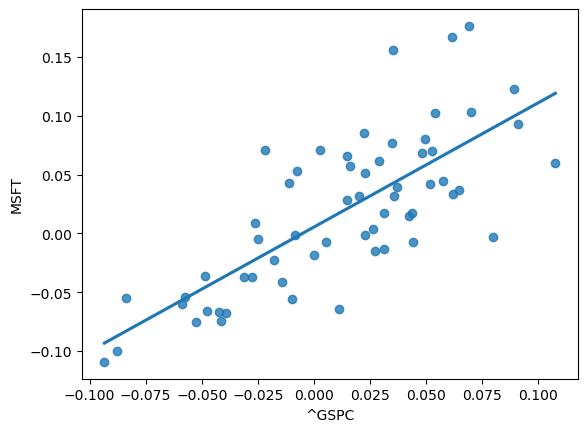

In [28]:
sns.regplot(x='^GSPC', y='MSFT', data = mtl_ret, ci=None) #specify the dataframe
plt.show()

## Risk free rate?? 

 r = alpha + beta*return_market + error term


## With risk free rate 
r-rf = alpha + beta * (return_market - rf) + error term

## Mr. French library

In [20]:
%pip install pandas_datareader
import pandas_datareader.data as reader
import pandas as pd

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [34]:
rf = reader.DataReader('F-F_Research_Data_Factors', 'famafrench', start, end)[0].RF
rf = rf[1:]
print(rf.head())

Date
2020-08    0.01
2020-09    0.01
2020-10    0.01
2020-11    0.01
2020-12    0.01
Freq: M, Name: RF, dtype: float64


/home/8e6871ea-9e76-4029-849d-302a75dfa8e7/.local/lib/python3.11/site-packages/pandas_datareader/famafrench.py:114: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = read_csv(StringIO("Date" + src[start:]), **params)
/home/8e6871ea-9e76-4029-849d-302a75dfa8e7/.local/lib/python3.11/site-packages/pandas_datareader/famafrench.py:114: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = read_csv(StringIO("Date" + src[start:]), **params)


In [46]:
rf.index = pd.to_datetime(rf.index)
aligned_rf = rf.reindex(mtl_ret.index)
mtl_ret['MSFT-rf'], mtl_ret['^GSPC-rf'] = mtl_ret['MSFT'] - aligned_rf, mtl_ret['^GSPC'] - aligned_rf
mtl_ret.head()

TypeError: Passing PeriodDtype data is invalid. Use `data.to_timestamp()` instead